# Trading
## Report - 1 day


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de tener todas las importaciones necesarias para tus funciones personalizadas
from technical_analysis.indicators import calculate_rsi, calculate_sma, calculate_bollinger, calculate_volume_oscillator
from technical_analysis.get_strategies import get_strategies
from technical_analysis.backtest import backtest
from technical_analysis.generate_buy_signals import generate_buy_signals
from technical_analysis.generate_sell_signals import generate_sell_signals
from technical_analysis.set_params import set_params
from technical_analysis.optimize import optimize


[{'id': 1, 'indicators': ['SMA'], 'params': {}}, {'id': 2, 'indicators': ['RSI'], 'params': {}}, {'id': 3, 'indicators': ['SMA', 'RSI'], 'params': {}}, {'id': 4, 'indicators': ['Bollinger Bands'], 'params': {}}, {'id': 5, 'indicators': ['SMA', 'Bollinger Bands'], 'params': {}}]


In [2]:
# Cargar conjunto de datos
data_1d = pd.read_csv("data/aapl_1d_train.csv")


In [3]:
# Calcula los indicadores para el conjunto de datos
data_1d['RSI'] = calculate_rsi(data_1d, window=14)
data_1d['SMA'] = calculate_sma(data_1d['Close'], window=50)
data_1d['BB_mavg'], data_1d['BB_hband'], data_1d['BB_lband'] = calculate_bollinger(data_1d, 20, 2)
data_1d['Volume_Osc'] = calculate_volume_oscillator(data_1d, 5, 20)


In [4]:
strategies = get_strategies()
# Genera señales de compra y venta para las estrategias
buy_signals = generate_buy_signals(data_1d, strategies)
sell_signals = generate_sell_signals(data_1d, strategies)

In [5]:
# Realiza el backtesting para cada estrategia y guarda los resultados
backtest_results = backtest(data_1d, buy_signals, sell_signals, initial_cash=10000, commission_per_trade=0.001, shares_to_operate=10, stop_loss=0.01, take_profit=0.01)


In [6]:
# Realizar la optimización
study = optimize(data_1d, n_trials=100)


[I 2024-02-25 18:08:49,248] A new study created in memory with name: no-name-72db0b25-99a1-4c97-896c-e413c82b9aba
[I 2024-02-25 18:08:49,509] Trial 0 finished with value: -7.939104999997653e-05 and parameters: {'short_window': 7, 'long_window': 183, 'rsi_period': 23, 'bb_window': 27, 'bb_std': 3, 'short_vol_window': 11, 'long_vol_window': 42}. Best is trial 0 with value: -7.939104999997653e-05.
[I 2024-02-25 18:08:49,672] Trial 1 finished with value: -0.0025421778000000632 and parameters: {'short_window': 23, 'long_window': 133, 'rsi_period': 26, 'bb_window': 48, 'bb_std': 2, 'short_vol_window': 19, 'long_vol_window': 33}. Best is trial 0 with value: -7.939104999997653e-05.
[I 2024-02-25 18:08:49,841] Trial 2 finished with value: -0.0011647589000001609 and parameters: {'short_window': 26, 'long_window': 157, 'rsi_period': 20, 'bb_window': 43, 'bb_std': 3, 'short_vol_window': 19, 'long_vol_window': 30}. Best is trial 0 with value: -7.939104999997653e-05.
[I 2024-02-25 18:08:50,011] Tria

In [8]:
# Compara los resultados del backtesting con una estrategia pasiva (por ejemplo, comprar y mantener)
passive_strategy_return = (data_1d['Close'].iloc[-1] - data_1d['Close'].iloc[0]) / data_1d['Close'].iloc[0]


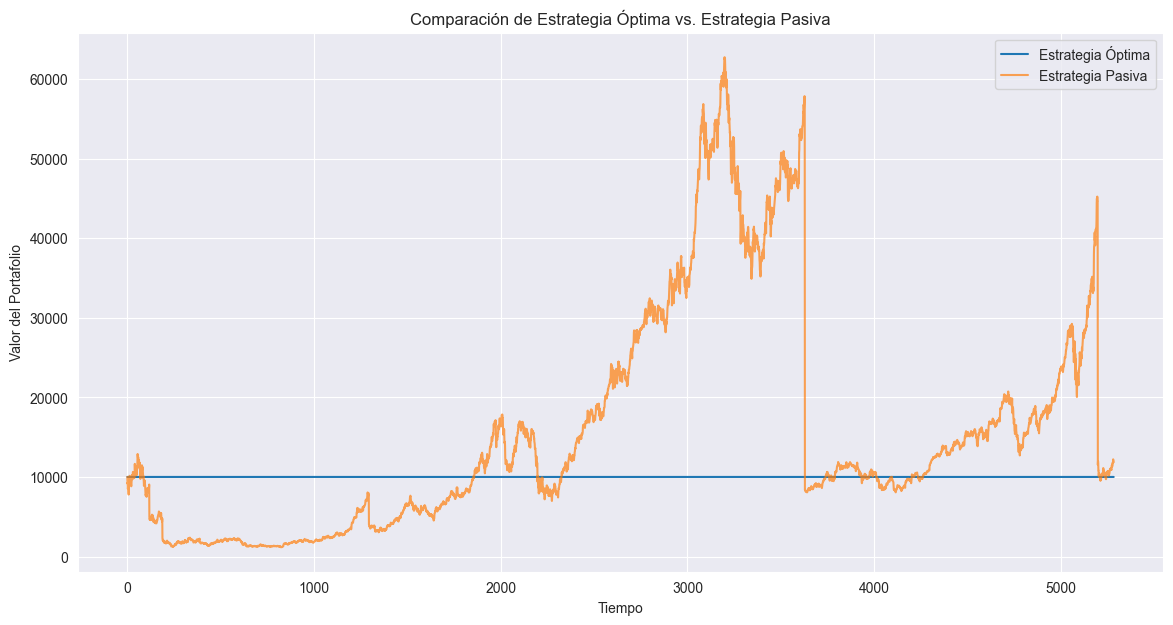

In [9]:
# Visualiza los resultados de la estrategia óptima y compáralos con la estrategia pasiva
plt.figure(figsize=(14, 7))
plt.plot(backtest_results['portfolio_value_over_time'], label='Estrategia Óptima')
plt.plot(data_1d['Close'] / data_1d['Close'].iloc[0] * 10000, label='Estrategia Pasiva', alpha=0.7)
plt.title('Comparación de Estrategia Óptima vs. Estrategia Pasiva')
plt.xlabel('Tiempo')
plt.ylabel('Valor del Portafolio')
plt.legend()
plt.show()
